In [32]:
import numpy as np 
import pandas as pd 
import seaborn as sb  
import statsmodels 

import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,
classification_report

df=pd.read_csv('C:\\Users\\Admin\\Desktop\\user.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [19]:
df['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [20]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [21]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [23]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

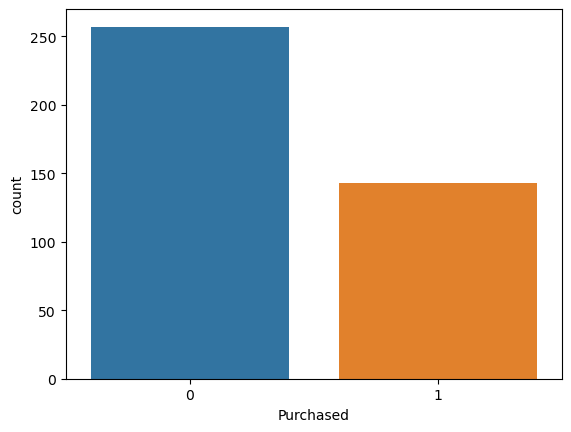

In [25]:
sb.countplot(x='Purchased',data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

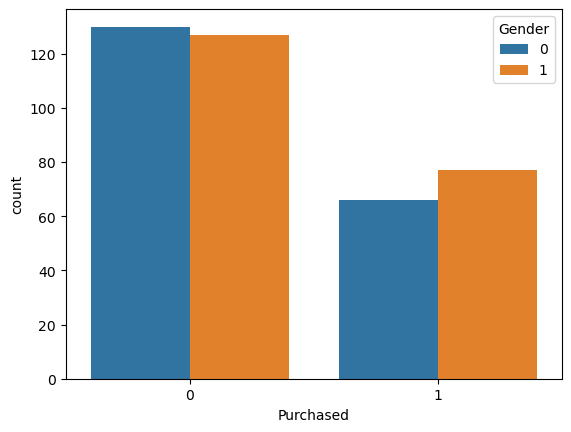

In [26]:
sb.countplot(x='Purchased',hue='Gender',data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

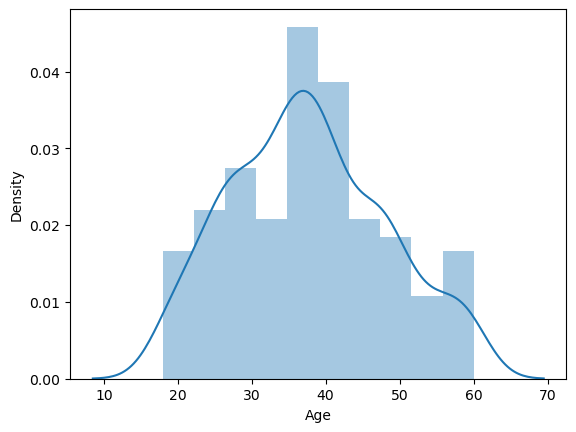

In [28]:
sb.distplot(df['Age'])

In [29]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [30]:
x_train,x_test,y_train,y_test=
train_test_split(x,y,test_size=0.2,random_state=1)

In [33]:
log_model=LogisticRegression()

In [34]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=log_model.predict(x_test)

In [36]:
y_pred[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [37]:
y_test[:5]

398    0
125    0
328    1
339    1
172    0
Name: Purchased, dtype: int64

In [39]:
y_prob=log_model.predict_proba(x_test)
y_prob[:5]

array([[0.83525267, 0.16474733],
       [0.71129737, 0.28870263],
       [0.36973661, 0.63026339],
       [0.34173819, 0.65826181],
       [0.36967507, 0.63032493]])

In [40]:
test_accuracy=accuracy_score(y_test,y_pred)
print("Model accuracy is",test_accuracy)

Model accuracy is 0.7125


In [42]:
con_matrix=confusion_matrix(y_test,y_pred)
con_matrix

array([[42,  6],
       [17, 15]], dtype=int64)

In [43]:
matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

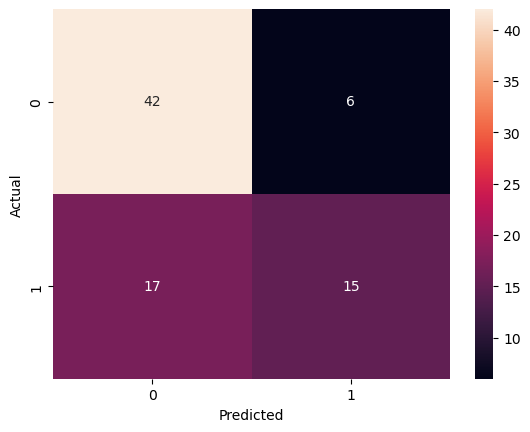

In [44]:
sb.heatmap(matrix,annot=True)

In [45]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        48
           1       0.71      0.47      0.57        32

    accuracy                           0.71        80
   macro avg       0.71      0.67      0.68        80
weighted avg       0.71      0.71      0.70        80

